In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [32]:
cd = pd.read_csv("Data/ratings_CDs_and_Vinyl.csv", sep=",", names =["uid","iid","overall","time"])
movie = pd.read_csv("Data/ratings_Movies_and_TV.csv", sep=",", names =["uid","iid","overall","time"])


In [33]:
# Tag each with a domain label
cd['domain'] = 'cd'
movie['domain'] = 'movie'
df = pd.concat([cd, movie], ignore_index=True)


In [34]:
# ========== Step 1: Basic Statistics ==========
domain_stats = df.groupby('domain').agg(
    num_users=('uid', 'nunique'),
    num_items=('iid', 'nunique'),
    num_interactions=('uid', 'count')
).reset_index()

print("\n📊 Interaction Volume per Domain:")
print(domain_stats)


📊 Interaction Volume per Domain:
  domain  num_users  num_items  num_interactions
0     cd    1578597     486360           3749004
1  movie    2088620     200941           4607047


#### How Many Users Are Shared Across Domains

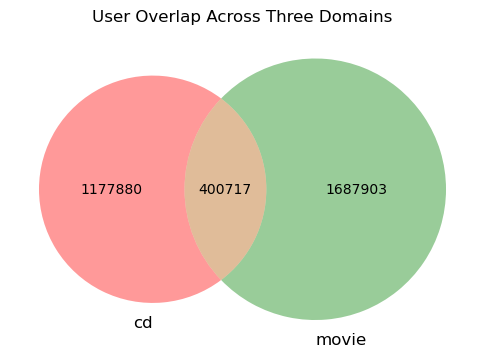

In [41]:
# # ========== Step 2: User Overlap Across Domains ==========
# from itertools import combinations
from matplotlib_venn import venn2

domain_user_sets = {
    domain: set(sub['uid'].unique())
    for domain, sub in df.groupby('domain')
}

domains = list(domain_user_sets.keys())
set1, set2= domain_user_sets[domains[0]], domain_user_sets[domains[1]]

plt.figure(figsize=(6, 6))
venn2([set1, set2], set_labels=domains)
plt.title("User Overlap Across Three Domains")
plt.show()


- The **intersection area** of the Venn diagram indicates how many users are active in **both the CD and Movie domains**.

📌 Insight:

    - **34%** of users in the **CD domain** and **23%** of users in the **Movie domain** are shared between both.

    - Users who appear **only one domain** (domain-specific users) represent **cold-start users** in the other domain.

🧠Implications:

    - Cross-domain recommendations can be tailored to domain-specific users to encourage engagement with unfamiliar platforms.

    - Collaborative transfer strategies can be applied:

        - For example, if Anna is active only in the CD domain and shares similar preferences with Susan, who is active in both CD and Movie domains, we can infer Anna’s movie preferences based on Susan’s behavior — and recommend relevant movies to Anna.
        
💡 This supports the use of cross-domain collaborative filtering to mitigate the cold-start problem and increase cross-platform engagement.